# Project: Investigation of TMDB movie dataset



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


To create this analysis I choose the dataset called 'TMDb movie data'. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), includinguser ratings and revenue,cast,release year.

Brief Description of each column in the dataset

1.**id** - Unique id's for each row

2.**imdb_id** - System generated unique id

3.**popularity** - popularity score

4.**budget** - budget in dollars

5.**revenue** - revenue in dollars

6.**original_title** - Movie title

7.**cast** - cast performed in movie

8.**homepage** - website link of movie

9.**director** - director name

10.**tagline** - tagline of movie

11.**keywords** - words used to give significant idea

12.**overview** - general review of movie

13.**runtime** - movie duration in minutes

14.**genres** - categories of movie

15.**production_companies** - company name which manages a movie process from start to finish

16.**release_date** - movie releasing date

17.**vote_count** - votes given by viewers

18.**vote_average** - average votes given by viewers

19.**release_year** - movie releasing year

20.**budget_adj**-budget in 2010 dollars,accounting for inflation

21.**revenue_adj** -revenue in 2010 dollars,accounting for inflation"

**Questions that I planned on exploring over the course of the report.**

>1. What kind of movie genres are most favoured?
>
>2. Growth of movies over the year 
>
>3. In which year highest number of movies released.
>
>4. Gross Profit by Year
>
>5. Most Profitable Months

In [236]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [237]:
df = pd.read_csv('tmdb-movies.csv')

In [238]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [239]:
df.info() # to find some information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [240]:
df.shape

(10866, 21)

In [241]:
df.isna().sum() # number of missing value in columns

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [242]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data Cleaning

> Dropping release date column because we take all useful information from that column but before droping it we will make a saperate column for the month number.
>
>Homepage column is also not very useful, So I drop it.
>
>imdb_id is system genrated numbers, which is no use so drop it

In [243]:
# changing column name of 'release_date' to 'release month' .
df.rename(columns = {"release_date" : "release_month"} , inplace = True)

# changing dates to months only
split_col = ['release_month'] 
for c in split_col:
    df[c] = df[c].apply(lambda x: x.split("/")[0])
    


In [244]:
df.drop_duplicates(inplace = True) # to drop any duplicate item if present
df.duplicated().sum()

0

In [245]:
df.drop(labels = ['imdb_id', 'homepage', 'tagline'],axis = 1, inplace = True) #droping some columns we dont need.

In [246]:
df.shape # for checking only

(10865, 18)

In [247]:
df.isna().sum().sort_values(ascending = False)

keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
overview                   4
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_month              0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

### Droping null values

In [248]:
df.dropna(how = 'any',inplace = True)

In [249]:
df.isna().sum().sort_values(ascending = False) # for checking purpose

revenue_adj             0
budget_adj              0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_month           0
vote_count              0
vote_average            0
release_year            0
id                      0
dtype: int64

In [250]:
runtime_zero = df[df['runtime'] == 0]
runtime_zero

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_month,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12,11,5.4,2015,0.000000e+00,0.0
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,biography|soccer player,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11,80,6.5,2015,0.000000e+00,0.0
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,woman director,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4,11,5.4,2015,0.000000e+00,0.0
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,kidnapping|brutality|violence|teenager|discovery,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10,16,3.4,2014,2.993546e+06,0.0
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,brazilian|biography|music|drama|documentary,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10,14,6.0,2014,0.000000e+00,0.0
5920,248842,0.165765,0,0,The Food Guide to Love,Richard Coyle|Leonor Watling|GinÃ©s GarcÃ­a Mi...,Dominic Harari|Teresa Pelegri,woman director,A dysfunctional love story about an Irish food...,0,Romance|Comedy,Haut et Court|Parallel Film Productions|Fox In...,12,12,5.6,2013,0.000000e+00,0.0
5938,191562,0.147188,0,0,Go Goa Gone,Saif Ali Khan|Anand Tiwari|Vir Das|Pooja Gupta,Krishna D.K.|Raj Nidimoru,hindi|zombies island|zombies|zombie survival,"A rave party off the coast of Goa, goes horrif...",0,Comedy|Horror,Eros International,5,16,5.3,2013,0.000000e+00,0.0


#### if runtime of a movie is 0 , then  the movie is not possible

In [251]:
df.drop(labels = runtime_zero.index, axis = 0,inplace = True)

In [252]:
df.shape

(8659, 18)

### doing same where budget and revenue is null

In [253]:
df.query('budget_adj == 0 & revenue_adj == 0').shape[0]

3075

In [254]:
# droping the columns where revenue and budget is zero
df.drop(df.query('budget_adj == 0 & revenue_adj == 0').index,axis = 0, inplace = True)

In [255]:
df.shape

(5584, 18)

#### removing the ' budget ' and ' revenue ' columns as ' budget_adj ' and ' revenue_adj ' columns are present and more capable of doing computation

In [256]:
df.drop(labels = ['budget','revenue'],axis = 1, inplace =True)

In [257]:
df.shape

(5584, 16)

In [258]:
# total profit will be given by
df['gross_profit_adj'] = df['revenue_adj'] - df['budget_adj']

### Our dataset contains lots of columns separted by '|' character. For better analysis I have decided to split them up.

In [259]:
def seperate(data):
    return data.str[0:].str.split('|',expand = True)

In [260]:
genres = seperate(df['genres'])
keywords = seperate(df['keywords']) 
cast = seperate(df['cast'])
production_companies = seperate(df['production_companies'])

In [261]:
genres.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [262]:
# 
genres['id'] = df['id']
keywords['id'] = df['id'] 
cast['id'] = df['id']
production_companies['id'] = df['id']


### droping other columns which we do not need for our analysis.

In [263]:
genres.drop(columns = [1,2,3,4],axis = 0, inplace = True)
production_companies.drop(columns = [1,2,3,4],axis = 0,inplace = True)

In [264]:
genres.head()

,0,id
0,Action,135397
1,Action,76341
2,Adventure,262500
3,Action,140607
4,Action,168259


In [265]:
# droping columns like genres,production_companies,cast,keywords from our main dataset
df.drop(columns = ['genres','keywords','cast','production_companies'],axis = 0,inplace = True)

In [266]:
df.shape

(5584, 13)

<a id='eda'></a>
## Exploratory Data Analysis

## 1.What kind of movie genres most favoured ?

In [267]:
genres[0].value_counts()

Drama              1293
Comedy             1185
Action              962
Horror              447
Adventure           380
Crime               251
Thriller            243
Fantasy             155
Animation           145
Science Fiction     120
Romance              91
Documentary          67
Mystery              64
Family               52
Music                44
War                  29
Western              26
History              25
TV Movie              5
Name: 0, dtype: int64

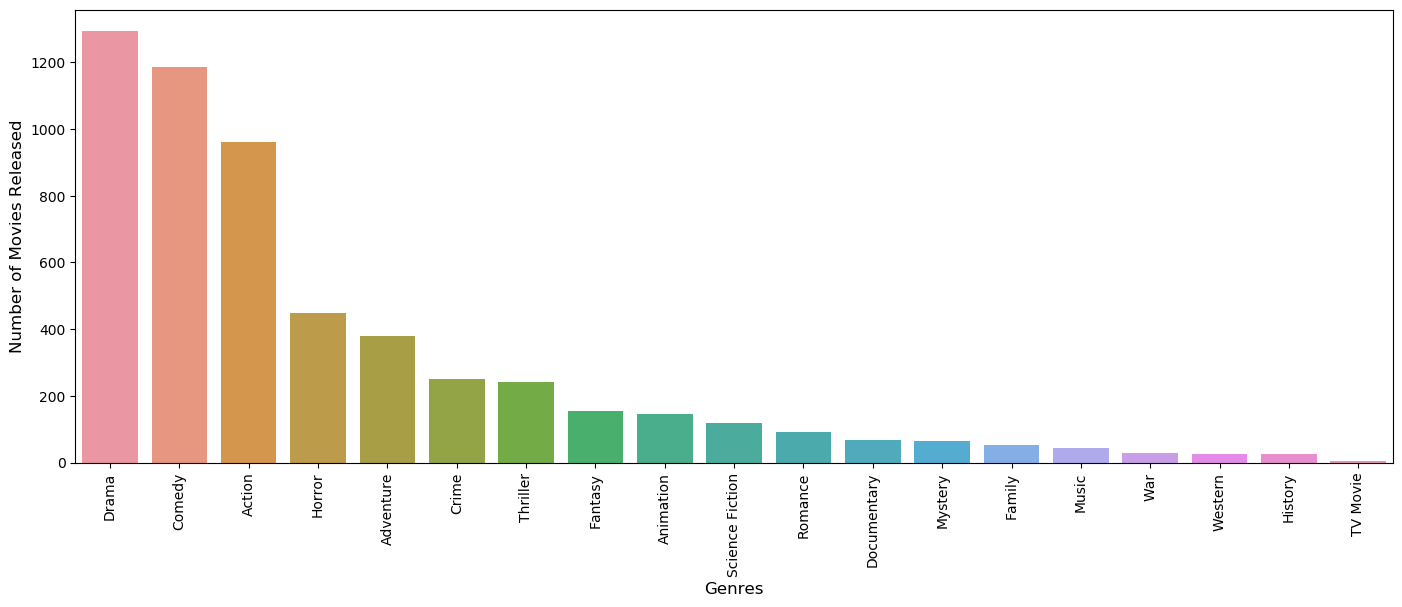

In [268]:
plt.figure(figsize = (17,6),dpi = 100);
sns.countplot(genres[0],order = genres[0].value_counts().index);
plt.xticks(rotation = 90);
plt.ylabel('Number of Movies Released',fontsize = 12);
plt.xlabel("Genres", fontsize = 12);

### as we take a look at the graph , most favoured genre is 'Drama', and least favoured is 'TV Movies' 

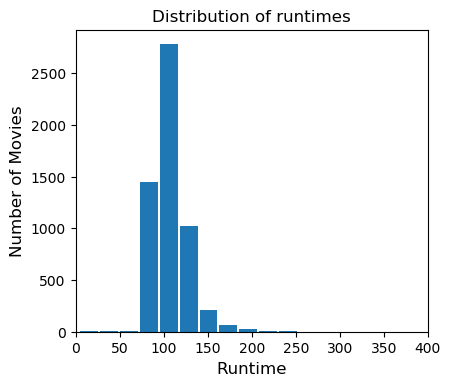

In [269]:
fig = plt.figure(figsize = (10,4),dpi = 100);
fig.add_subplot(1,2,1)
plt.hist(df['runtime'],bins = 31, rwidth = 0.9);
plt.xlabel('Runtime', fontsize = 12);
plt.ylabel('Number of Movies', fontsize = 12);
plt.title('Distribution of runtimes', fontsize = 12);
plt.xlim(0,400);

#### maximum no. of movies has runtime around 100 min.

In [270]:
print('Average movie runtime = ',df.runtime.mean())

Average movie runtime =  107.35816618911174


## in which year heighest  no. of movies released

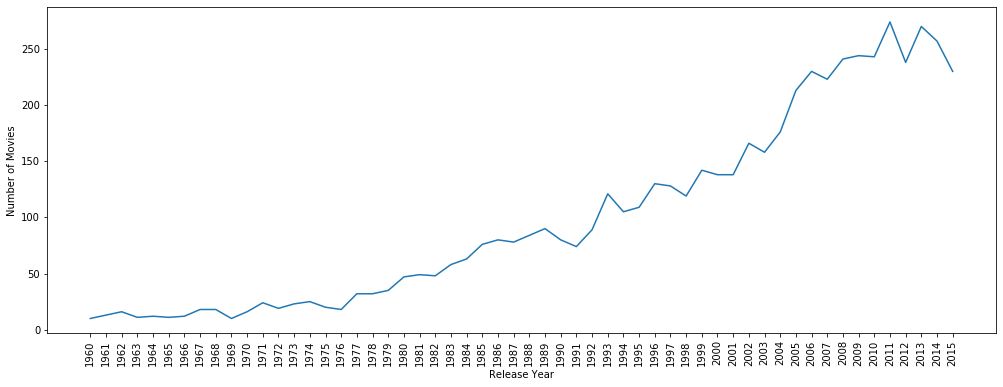

In [271]:
plot_line = pd.DataFrame(df['release_year'].value_counts().reset_index().sort_values(by = 'index'));
plt.figure(figsize = (17,6));
plt.plot(plot_line['index'],plot_line['release_year']);
plt.xticks(np.arange(1960,2016,1),rotation = 90);
plt.xlabel('Release Year');
plt.ylabel('Number of Movies');

### by looking at the graph we can say 2013 was the year

In [272]:
profits_each_year = df.groupby('release_year')['gross_profit_adj'].sum()
profits_each_year.head()

release_year
1960    8.762628e+08
1961    2.127059e+09
1962    1.159535e+09
1963    8.126972e+08
1964    2.119616e+09
Name: gross_profit_adj, dtype: float64

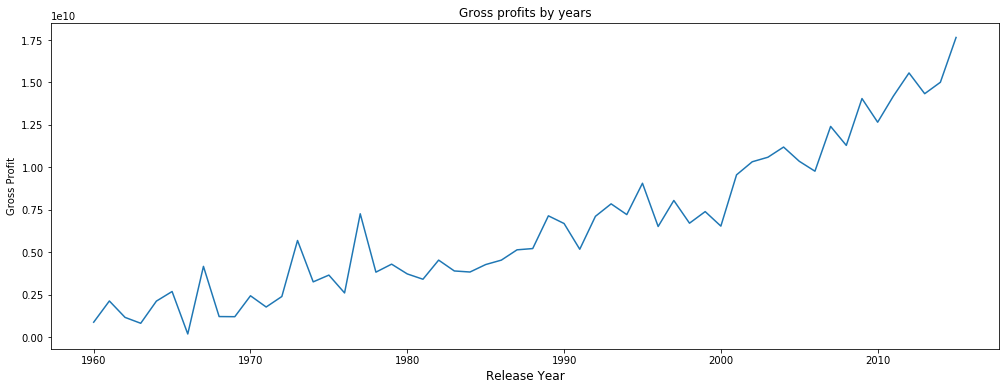

In [273]:
plt.figure(figsize = (17,6));
plt.plot(profits_each_year );
plt.xlabel('Release Year', fontsize = 12);
plt.ylabel('Gross Profit');
plt.title("Gross profits by years");

> In 2000 gross profit was 6.53 billion dollars and 2015 it has reach upto 17.65 billion dollars. which shows Growth of around 10 billion dollars in 15years.

## 5. Most Profitable Months

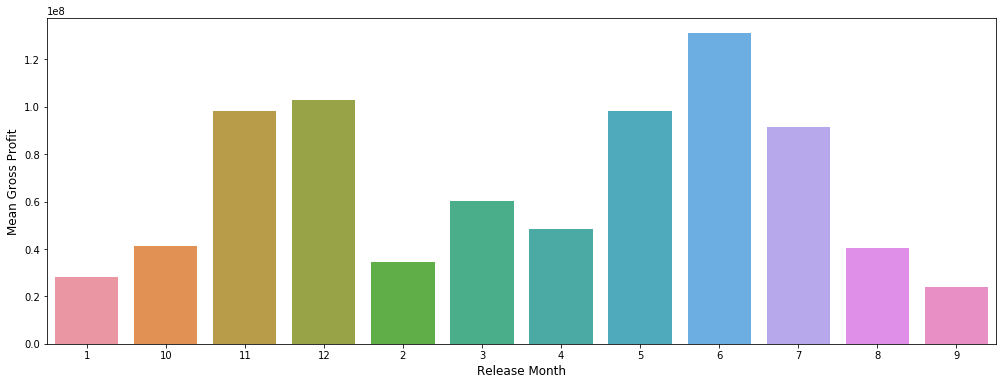

In [274]:
rel_mon = df.groupby('release_month')['gross_profit_adj'].mean().sort_values(ascending = False)
plt.figure(figsize = (17,6));
sns.barplot(x = rel_mon.index,
           y = rel_mon.values
           );
plt.xlabel('Release Month',fontsize = 12);
plt.ylabel('Mean Gross Profit', fontsize = 12);

> most profitable month is june 

## month in which maximum no. of movies released

In [285]:
month_of_release = df.release_month.value_counts()
month_of_release

9     687
12    566
10    549
8     477
6     445
3     443
5     436
7     433
11    406
4     400
2     372
1     370
Name: release_month, dtype: int64

> 9th month means september is the month in which height no. of movie released

<a id='conclusions'></a>
## Conclusions

>1.80% of growth can be observed in releasing Movies from 1990 to 2000.
>
>2.From 1960 to 2015 gross profit has increased from 1.25 billion dollars to 17.5 billion dollars. from 2000 to 2015 i.e in just 15years it has increased upto 10 billion dollars.
>
>3.Movie runtimes are generally between 80mins to 150mins.
>
>4.Highest Number of movies released in 2013.
>
>5.Movies are mostly made in drama, comedy, thriller, action, romance, adventure but apart from adventure & action
>
>6.September is the month in which maximum no. of movie was released